<a href="https://colab.research.google.com/github/Niiikay/MyML/blob/main/Chicago_Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

In [2]:
#Input all 4 files 
# error_bad_lines or on_bad_lines gets rid of all the lines that has excessive fields. The line is omitted

df_crime_01_04 = pd.read_csv('/content/drive/MyDrive/Datasets/Chicago_Crimes_2001_to_2004.csv', error_bad_lines = False)
df_crime_05_07 = pd.read_csv('/content/drive/MyDrive/Datasets/Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
df_crime_08_11 = pd.read_csv('/content/drive/MyDrive/Datasets/Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
df_crime_12_17 = pd.read_csv('/content/drive/MyDrive/Datasets/Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
#concatenating all 4 files

df_crime = pd.concat([df_crime_01_04, df_crime_05_07, df_crime_08_11, df_crime_12_17])

In [4]:
# Retrieves the number of rows and columns in the concatented dataset 

df_crime.shape

(7941282, 23)

In [5]:
df_crime.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [6]:
df_crime.shape

(6170812, 23)

In [7]:
#changing column "Date" to a datatime format

df_crime.Date = pd.to_datetime(df_crime.Date, format='%m/%d/%Y %I:%M:%S %p')

In [11]:
df_crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [ ]:
# Retrieves a list of all column names

df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [ ]:
# Retrieving the types of crime that have been taking place in Chicago. The column that we're going to retrieve is 'Primary Type'

df_crime['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [ ]:
#Retrieving the top 10 number of times of these crimes have occured in descending order of count

df_crime['Primary Type'].value_counts().iloc[:10]

THEFT                  1640506
BATTERY                1442716
CRIMINAL DAMAGE         923000
NARCOTICS               885431
OTHER OFFENSE           491922
ASSAULT                 481661
BURGLARY                470958
MOTOR VEHICLE THEFT     370548
ROBBERY                 300453
DECEPTIVE PRACTICE      280931
Name: Primary Type, dtype: int64

In [ ]:
df_crime

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,2016-05-03 23:33:00,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016.0,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,2016-05-03 23:30:00,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016.0,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,2016-05-03 00:15:00,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016.0,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,2016-05-03 21:07:00,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016.0,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [ ]:
#setting date as the index 

df_crime.index = pd.DatetimeIndex(df_crime.Date)

Text(0, 0.5, 'Number of Crimes')

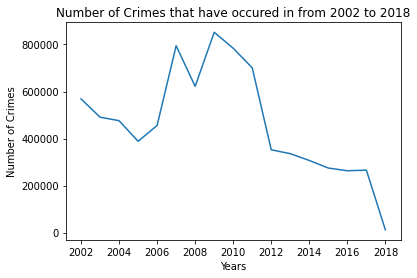

In [ ]:


plt.plot(df_crime.resample('Y').size())
plt.title('Number of Crimes that have occured in from 2002 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [ ]:
crime_peak = df_crime[df_crime['Year'] == 2009.0]

In [ ]:
crime_peak

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,47310,10428441,HZ164773,2009-01-01 00:00:00,026XX N MC VICKER AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,...,29.0,19.0,17,NaN,NaN,2009.0,05/11/2016 03:48:18 PM,NaN,NaN,NaN
2009-01-01 05:40:00,65182,4890,HR100192,2009-01-01 05:40:00,001XX N GREEN ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,27.0,28.0,01A,1170698.0,1901438.0,2009.0,08/17/2015 03:03:40 PM,41.885028,-87.648623,"(41.885028069, -87.648623471)"
2009-01-03 04:44:00,65747,4891,HR103491,2009-01-03 04:44:00,113XX S RACINE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,...,34.0,75.0,01A,1170353.0,1829687.0,2009.0,08/17/2015 03:03:40 PM,41.688143,-87.651978,"(41.688142576, -87.651978337)"
2009-01-03 18:04:00,66497,4892,HR104305,2009-01-03 18:04:00,021XX E 68TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,5.0,43.0,01A,1191490.0,1860300.0,2009.0,08/17/2015 03:03:40 PM,41.771663,-87.573609,"(41.771662784, -87.573609191)"
2009-01-04 16:39:00,67272,4893,HR105382,2009-01-04 16:39:00,092XX S DOBSON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,8.0,47.0,01A,1184831.0,1843917.0,2009.0,08/17/2015 03:03:40 PM,41.726865,-87.598531,"(41.72686498, -87.598531415)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-01-01 00:01:00,6222496,10806337,JA105048,2009-01-01 00:01:00,001XX W ELM ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,...,42.0,8.0,11,NaN,NaN,2009.0,01/06/2017 03:55:08 PM,NaN,NaN,NaN
2009-08-18 12:00:00,6224735,10809595,JA106570,2009-08-18 12:00:00,040XX S OAKENWALD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,4.0,36.0,11,NaN,NaN,2009.0,01/09/2017 03:46:53 PM,NaN,NaN,NaN
2009-11-20 21:00:00,6226096,10811867,JA111014,2009-11-20 21:00:00,014XX W NORTH SHORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,...,40.0,1.0,02,NaN,NaN,2009.0,01/11/2017 03:52:20 PM,NaN,NaN,NaN


Text(0, 0.5, 'Number of Crimes')

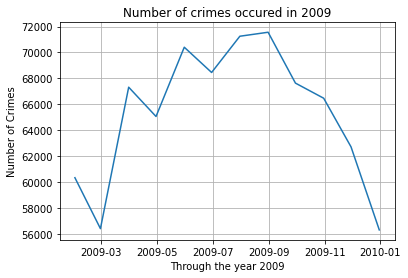

In [ ]:
# Since we notice that the crime rate in 2009 reached it's peak
# Let's have a closer look at it by downsampling to a wider data frame - more details/numbers

plt.plot(crime_peak.resample('M').size())

plt.grid()
plt.title('Number of crimes occured in 2009')
plt.xlabel('Through the year 2009')
plt.ylabel('Number of Crimes')


fb

In [ ]:
pre_reset_index_crime = df_crime.resample('M').size()

In [ ]:
pre_reset_index_crime

Date
2001-01-31    74995
2001-02-28    66288
2001-03-31    53122
2001-04-30    40166
2001-05-31    41876
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 193, dtype: int64

In [ ]:
crime = df_crime.resample('M').size().reset_index()

In [ ]:
crime

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580
